# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Part I - WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your first objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

After each plot add a sentence or too explaining what the code is and analyzing.

Your next objective is to run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

After each pair of plots explain what the linear regression is modelling such as any relationships you notice and any other analysis you may have.

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save a CSV of all retrieved data and a PNG image for each scatter plot.

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
weather_api_key

'1bdec39e5a684e1ba507011729435e8e'

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code #----> I added this code :)
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        # countries.append(country.upper())

# Print the city count to confirm sufficient count
print(len(cities))
# print(len(countries))

599


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Starting URL for Weather Map API Call

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
       
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Butaritari
Processing Record 2 | Smithers
Processing Record 3 | Severo-Kuril'sk
Processing Record 4 | Chokurdakh
Processing Record 5 | Upernavik
Processing Record 6 | Busselton
Processing Record 7 | Albany
Processing Record 8 | Dingalan
City not found. Skipping...
Processing Record 9 | Bluff
Processing Record 10 | Barrow
Processing Record 11 | Rikitea
Processing Record 12 | Mataura
Processing Record 13 | Norman Wells
Processing Record 14 | Tasiilaq
Processing Record 15 | Yar-Sale
Processing Record 16 | College
Processing Record 17 | Abadan
Processing Record 18 | Ribeira Grande
Processing Record 19 | Flinders
Processing Record 20 | Carnarvon
Processing Record 21 | Grand Gaube
Processing Record 22 | Mananara
City not found. Skipping...
Processing Record 23 | Kedrovyy
Processing Record 24 | Hong Kong
Processing Record 25 | Kahului
Processing Record 26 | Gladstone
Processing Record 27 | Sibolga
Processing Record

Processing Record 236 | Nemuro
Processing Record 237 | San Carlos
City not found. Skipping...
Processing Record 238 | Maxixe
City not found. Skipping...
Processing Record 239 | Mitsamiouli
Processing Record 240 | Bowen
Processing Record 241 | Lavrentiya
Processing Record 242 | Coyhaique
Processing Record 243 | Fairbanks
City not found. Skipping...
Processing Record 244 | Yulara
City not found. Skipping...
Processing Record 245 | Chulman
Processing Record 246 | Saldanha
Processing Record 247 | Borgarnes
Processing Record 248 | Lincoln
Processing Record 249 | Kuusamo
Processing Record 250 | Sumbe
Processing Record 251 | Hakkari
Processing Record 252 | Sulina
Processing Record 253 | Zyryanka
Processing Record 254 | Alice Springs
Processing Record 255 | Sur
Processing Record 256 | Kodiak
Processing Record 257 | Manacapuru
City not found. Skipping...
Processing Record 258 | Andra
Processing Record 259 | Lashio
Processing Record 260 | Jalalpur Jattan
Processing Record 261 | Goderich
Processi

Processing Record 466 | Kieta
Processing Record 467 | Cockburn Town
Processing Record 468 | Sabang
City not found. Skipping...
Processing Record 469 | Culebra
Processing Record 470 | Lebedinyy
Processing Record 471 | Jumla
Processing Record 472 | Jinji
Processing Record 473 | Votkinsk
Processing Record 474 | Wattegama
Processing Record 475 | Whitianga
Processing Record 476 | Salym
Processing Record 477 | San Ignacio
Processing Record 478 | Sao Joao da Barra
Processing Record 479 | Vila do Maio
Processing Record 480 | Acapulco de Juarez
Processing Record 481 | Rawson
Processing Record 482 | De Panne
Processing Record 483 | Beringovskiy
Processing Record 484 | Nha Trang
Processing Record 485 | Sale
Processing Record 486 | Vila Velha
Processing Record 487 | Mastic Beach
Processing Record 488 | Husavik
Processing Record 489 | Kununurra
Processing Record 490 | Balabac
Processing Record 491 | Clarence Town
Processing Record 492 | Road Town
Processing Record 493 | Margate
Processing Record 49

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create a dictonary with the lists generated
new_cities = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(new_cities)

# Display count of weather data values 
weather_data.count()

City          556
Cloudiness    556
Country       556
Date          556
Humidity      556
Lat           556
Lng           556
Max Temp      556
Wind Speed    556
dtype: int64

In [8]:
# just cleaning...

weather_data['Max Temp'] = weather_data['Max Temp'].replace('', np.nan)

weather_data = weather_data.dropna()

weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Butaritari,32,KI,1579611058,64,3.07,172.79,84.79,2.46
1,Smithers,90,CA,1579611059,92,54.78,-127.17,19.40,4.70
2,Severo-Kuril'sk,100,RU,1579611060,90,50.68,156.12,13.84,7.85
3,Chokurdakh,100,RU,1579611061,97,70.63,147.92,-24.09,8.79
4,Upernavik,100,GL,1579611062,57,72.79,-56.15,4.51,6.62


In [9]:
weather_data.to_csv("cities_weather_data.csv", encoding="utf-8", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

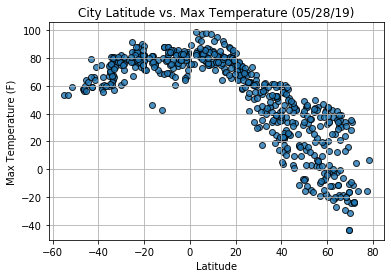

In [10]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], edgecolor="black", linewidths=1, 
            marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (05/28/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("01_MaxTemp_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

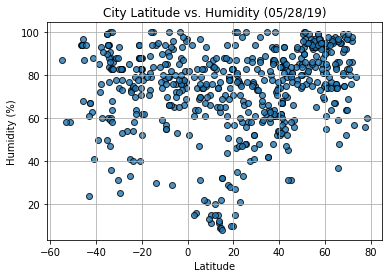

In [11]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], edgecolor="black", linewidths=1, 
            marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (05/28/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("02_Humidity_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

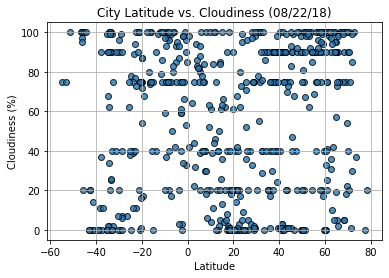

In [12]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], edgecolor="black", linewidths=1, 
            marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("03_Cloudiness_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

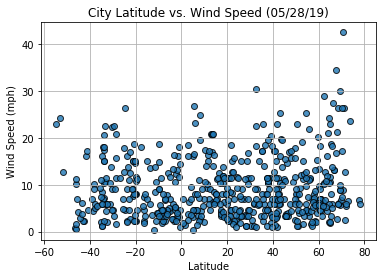

In [13]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], edgecolor="black", linewidths=1, 
            marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (05/28/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("04_Windspeed_Latitude.png")

# Show plot
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

**Northern Hemisphere DataFrames**

In [14]:
north_remembers = weather_data.loc[weather_data["Lat"] >= 0, :]

north_remembers.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Butaritari,32,KI,1579611058,64,3.07,172.79,84.79,2.46
1,Smithers,90,CA,1579611059,92,54.78,-127.17,19.40,4.70
2,Severo-Kuril'sk,100,RU,1579611060,90,50.68,156.12,13.84,7.85
3,Chokurdakh,100,RU,1579611061,97,70.63,147.92,-24.09,8.79
4,Upernavik,100,GL,1579611062,57,72.79,-56.15,4.51,6.62


**Southern Hemisphere DataFrames**

In [15]:
cercy = weather_data.loc[weather_data["Lat"] <= 0, :]

cercy.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
5,Busselton,25,AU,1579611063,36,-33.65,115.33,64.00,17.38
8,Bluff,100,NZ,1579611067,94,-46.60,168.33,57.99,0.85
10,Rikitea,94,PF,1579611069,79,-23.12,-134.97,77.47,10.98
11,Mataura,97,NZ,1579611070,94,-46.19,168.86,57.99,0.65
18,Flinders,2,AU,1579611078,94,-34.58,150.86,71.01,1.12


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

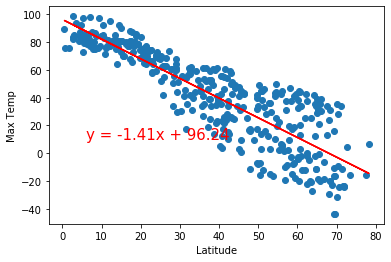

In [16]:
x_values = north_remembers['Lat']
y_values = north_remembers['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

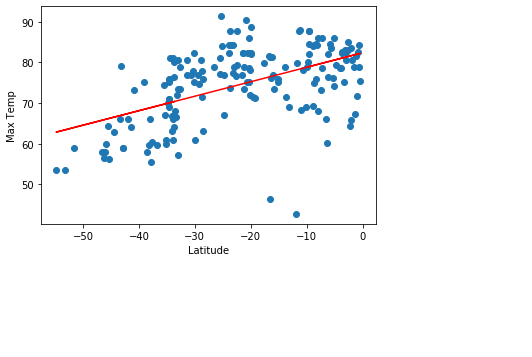

In [17]:
x_values = cercy['Lat']
y_values = cercy['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

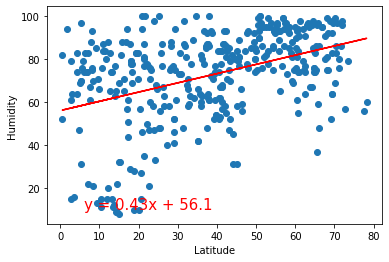

In [18]:
x_values = north_remembers['Lat']
y_values = north_remembers['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

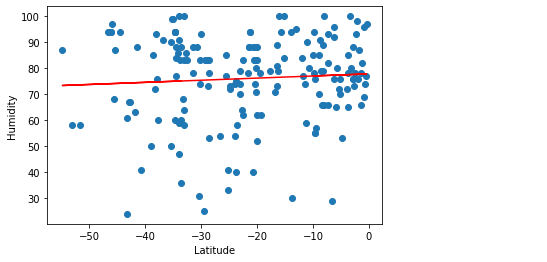

In [19]:
x_values = cercy['Lat']
y_values = cercy['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

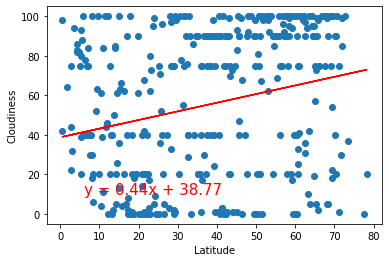

In [20]:
x_values = north_remembers['Lat']
y_values = north_remembers['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

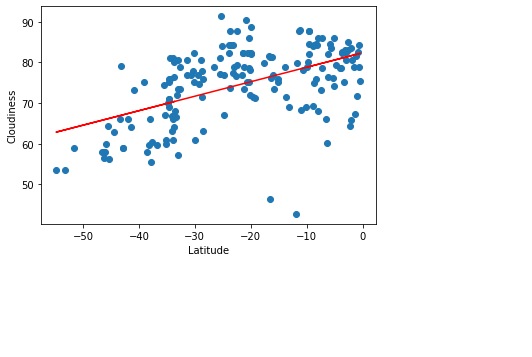

In [21]:
x_values = cercy['Lat']
y_values = cercy['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

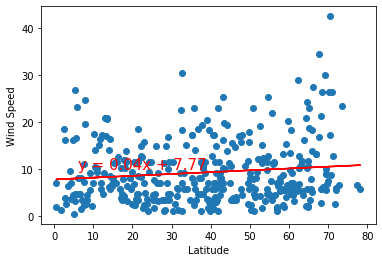

In [22]:
x_values = north_remembers['Lat']
y_values = north_remembers['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

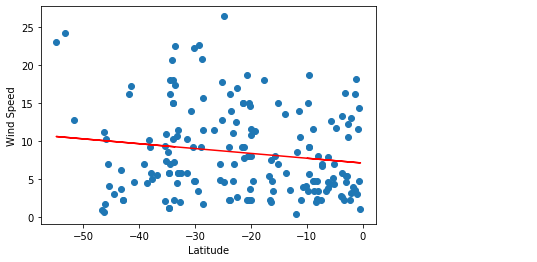

In [23]:
x_values = cercy['Lat']
y_values = cercy['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()